<a href="https://colab.research.google.com/github/medjbersoundous/DeepLearning-Mnist/blob/main/deepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical


In [ ]:
# so we gonna split the dataset into training and testing sets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Sequential()
# we add Flatten to convert the input image into a 1D array
model.add(Flatten(input_shape=(28, 28)))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


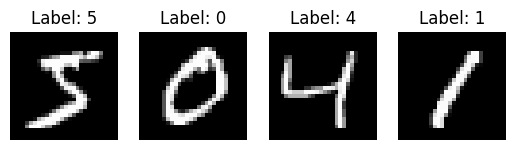

In [ ]:
# we gonna see the first 4 images from the training set
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


In [ ]:
#checking the shape of the training set
X_train.shape

(60000, 28, 28)

In [ ]:
# here we gonna normalize the pixel values to be between 0 and 1
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# converting class labels into one-hot encoding format
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compiling the model with loss function, optimizer, and evaluation metric
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
# Training the model on the training dataset
history = model.fit(X_train, y_train,
                    epochs=5,
                    validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8638 - loss: 0.4778 - val_accuracy: 0.9519 - val_loss: 0.1649
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9599 - loss: 0.1378 - val_accuracy: 0.9643 - val_loss: 0.1199
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9738 - loss: 0.0890 - val_accuracy: 0.9709 - val_loss: 0.0966
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9832 - loss: 0.0604 - val_accuracy: 0.9742 - val_loss: 0.0879
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9868 - loss: 0.0455 - val_accuracy: 0.9724 - val_loss: 0.0930


In [ ]:
# Evaluating the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9715 - loss: 0.0956
Test accuracy: 0.9753


In [ ]:
# so we can see our model achieved a high test accuracy of 97.53%, which is strong performance
# so we can say that the model generalizes well to unseen data showing no significant overfitting